In [16]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


dataframe_train = pd.read_csv ("train.csv")
dataframe_test = pd.read_csv ("test.csv")

dataframe_conc = pd.concat([dataframe_train, dataframe_test])

dataframe_train.shape, dataframe_test.shape, dataframe_conc.shape
dataframe_train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,target
0,-6.130724,7.429628,3.651437,-1.950971,-3.384415,1.095934,-3.077774,-2.619091,5.128201,1.228476,...,0.392978,4.920467,16.610460,-2.430804,-1.405573,18.610209,-4.140715,6.027816,-20.288145,0
1,5.161836,-6.514011,-7.474612,-4.544336,-13.081404,1.637562,-1.094672,-1.253545,-2.955342,-10.958200,...,-4.840233,-0.514308,4.613289,2.391302,-4.795664,4.208278,-2.017168,-8.510424,10.806639,0
2,-2.971550,-21.508184,-1.125457,1.524129,3.027444,1.045879,1.551050,1.512075,-1.955564,3.683893,...,-0.385303,2.647917,-2.200556,1.058671,1.076312,-7.802389,-7.553953,0.636639,14.274950,0
3,6.724419,0.566489,0.509764,-4.524162,10.367236,2.083270,0.741790,-2.077787,-2.912744,-4.040637,...,4.731346,15.378418,-14.031666,2.659410,5.123620,-8.500321,3.417960,-14.798490,-6.132800,1
4,-2.213659,-4.678213,-0.135845,2.375933,0.916649,1.027195,-0.353265,-0.220609,-3.416823,-5.964181,...,1.598330,-4.996614,4.504269,1.918961,-2.076223,0.154039,-2.016779,10.803205,5.942927,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958,1.554111,2.018845,-2.550991,-2.049014,0.931923,1.329123,2.260598,0.907393,0.559868,-0.366525,...,-2.078071,2.774934,-5.819371,-1.397282,0.629832,-1.098601,-7.498520,-7.752161,12.691050,0
6959,5.341612,-4.057497,0.712336,-0.529023,2.389152,1.048196,-4.248458,-2.516312,1.612912,0.088317,...,-0.120301,-3.247273,-3.348203,2.651849,1.059434,-2.842064,-1.960203,-5.095832,-0.174943,0
6960,-2.348591,-8.263995,-0.318484,1.851011,-4.880470,1.392923,-4.348202,2.937274,-3.067852,-0.173702,...,0.819033,0.794195,9.353774,-1.841798,-1.116251,6.708149,-1.841971,5.747190,-7.608288,0
6961,5.481595,4.899412,-0.421851,4.639328,-20.671090,1.088426,-3.838050,0.622003,1.548813,-8.847505,...,1.697137,-8.315975,6.149865,1.437154,-7.284716,4.566744,-0.908937,11.555781,2.889093,0


In [5]:
rs = np.random.RandomState(0)
#df = pd.DataFrame(rs.rand(10, 10))
corr = dataframe_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,target
0,1.000000,-0.150504,-0.031684,-0.119729,-0.429410,-0.012056,0.163108,0.060768,0.013848,-0.104773,0.237665,0.149895,-0.091785,0.016672,0.016753,-0.477741,-0.043302,-0.015497,-0.152718,0.190584,-0.096562,0.178463,0.164363,-0.125456,-0.337168,-0.061916,-0.153491,-0.173254,0.052345,-0.144753,-0.018940,-0.009456
1,-0.150504,1.000000,0.249603,0.041488,-0.039483,-0.019360,-0.195778,-0.191716,0.127857,-0.199508,0.139047,-0.166060,0.237614,0.112427,-0.468066,-0.122787,-0.137192,-0.213601,-0.007135,0.053529,-0.260690,-0.121946,0.259262,-0.006155,0.190114,-0.307530,-0.137446,0.392216,0.284322,-0.005216,-0.143356,-0.016829
2,-0.031684,0.249603,1.000000,0.013315,0.263741,-0.013336,0.117693,0.024842,0.262330,0.401124,-0.010746,0.129228,0.208119,-0.033604,0.093598,-0.245421,0.004657,0.009416,0.054872,0.022424,0.081488,0.205685,0.020286,-0.248789,-0.019600,-0.019678,0.114791,0.122596,-0.046960,0.226250,-0.265365,-0.013655
3,-0.119729,0.041488,0.013315,1.000000,-0.045332,0.031096,-0.109396,0.100969,0.069063,0.242621,-0.075826,-0.156553,-0.121246,0.027686,0.049728,0.220741,0.085964,0.086544,0.108206,0.098086,0.101832,-0.113575,-0.116189,-0.373033,0.080756,-0.036977,-0.031316,-0.190707,-0.002422,0.313397,0.228647,0.030377
4,-0.429410,-0.039483,0.263741,-0.045332,1.000000,0.011108,0.205774,-0.104539,-0.077366,0.363558,0.149486,0.315509,0.347398,-0.082398,-0.044043,0.165506,-0.157620,-0.110253,-0.084899,-0.246415,0.266201,0.093359,-0.156819,0.144513,-0.147485,0.351241,0.550878,-0.319312,0.023675,-0.178696,-0.092773,0.004322
5,-0.012056,-0.019360,-0.013336,0.031096,0.011108,1.000000,0.018631,0.011494,-0.012974,0.012688,-0.010025,-0.010713,0.004208,-0.005868,-0.007907,0.011811,-0.001283,0.044798,0.013623,0.007402,0.011574,0.000399,0.019587,-0.002047,0.009151,-0.007322,0.015552,-0.020115,-0.026939,-0.002515,0.037116,0.858760
6,0.163108,-0.195778,0.117693,-0.109396,0.205774,0.018631,1.000000,0.036156,0.112151,0.173130,0.057142,0.109011,0.069086,0.082227,0.152229,-0.052662,-0.157322,-0.086236,-0.155509,0.107351,-0.026385,0.304553,-0.089440,-0.113735,-0.239311,0.106869,0.170283,-0.204228,0.137407,-0.358567,0.226725,0.011769
7,0.060768,-0.191716,0.024842,0.100969,-0.104539,0.011494,0.036156,1.000000,0.019800,-0.029455,0.027291,-0.018671,0.054347,0.235482,0.114687,-0.293454,-0.065363,0.229125,-0.016963,0.036256,-0.118520,-0.154843,-0.092679,-0.253981,-0.334525,0.067639,0.026509,-0.317490,-0.059970,0.192219,0.486808,0.016147
8,0.013848,0.127857,0.262330,0.069063,-0.077366,-0.012974,0.112151,0.019800,1.000000,0.182448,0.067739,0.007979,-0.025197,0.023483,0.130461,-0.332310,-0.006108,-0.083296,0.032218,0.186428,0.144517,0.387476,-0.114682,-0.307185,0.159375,0.085408,-0.033855,0.131899,-0.109823,-0.115349,-0.171463,-0.013129
9,-0.104773,-0.199508,0.401124,0.242621,0.363558,0.012688,0.173130,-0.029455,0.182448,1.000000,-0.104576,0.239475,0.236683,-0.185186,0.285566,-0.032965,0.091770,-0.162260,-0.068708,0.410856,0.328781,0.417740,-0.355922,-0.065667,-0.070035,0.082072,0.296589,-0.210119,-0.224147,-0.140438,-0.172007,0.010100


In [18]:
#dataframe_conc_norm = (dataframe_conc-dataframe_conc.min())/(dataframe_conc.max()-dataframe_conc.min())
#dataframe_conc_norm = (dataframe_conc-dataframe_conc.mean())/dataframe_conc.std()

#for i in range(30):
#    if(i!=5):
#        dataframe_conc_norm[str(i+31)] = dataframe_conc_norm['5']+dataframe_conc_norm[str(i)]

dataframe_conc_norm = (dataframe_conc-dataframe_conc.mean())/dataframe_conc.std()

dataframe_conc_norm = dataframe_conc_norm.drop(['5'], axis=1)

dataframe_train_norm = dataframe_conc_norm.iloc[0:6963]
dataframe_train_norm['target'] = dataframe_train['target']

dataframe_testz_norm = dataframe_conc_norm.iloc[6963:10884]
dataframe_train_norm.shape, dataframe_test_norm.shape, dataframe_conc.shape
#dataframe_train_norm['target']

/tmp/ipykernel_114995/3856146184.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_train_norm['target'] = dataframe_train['target']


((6963, 31), (3920, 31), (10883, 32))

In [20]:
from imblearn.over_sampling import SMOTE
#smote = SMOTE()
#X_smote, Y_smote = smote.fit_sample(normalized_dataframe_train.iloc[:,:31], normalized_dataframe_train['target'])

from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')

X = dataframe_train_norm.drop(['target'], axis = 1)
y = dataframe_train_norm['target']

#X_tl, Y_tl= tl.fit_sample(X_new, y)
X_tl, Y_tl= tl.fit_sample(X, y)

print(np.shape(X_tl))


smote = SMOTE()
X_smote_tl, Y_smote_tl = smote.fit_sample(X_tl, Y_tl)
print(np.shape(X_smote_tl))


tl = TomekLinks(sampling_strategy='all')
X_smote_tl, Y_smote_tl = tl.fit_sample(X_smote_tl, Y_smote_tl)

print(np.shape(X_smote_tl))

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(X_smote_tl.values)
#X_smote_tl = scaler.transform(X_smote_tl.values)



(6864, 30)
(9728, 30)
(9718, 30)


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import regularizers

#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


model=models.Sequential()

#model.add(layers.Dropout(0.001, ))
model.add(layers.Dense(80,kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(30,) ) )
#model.add(layers.Dense(19,kernel_regularizer=regularizers.l2(0.005),activation='relu') )
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(layers.Dropout(0.6))
#model.add(layers.Dense(70,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
#model.add(layers.Dropout(0.7))

model.add(layers.Dense(1,activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer = keras.optimizers.Adam(learning_rate=0.0003),
    #optimizer = 'adam',
    metrics=['binary_accuracy']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                2480      
                                                                 
 dropout_6 (Dropout)         (None, 80)                0         
                                                                 
 dense_10 (Dense)            (None, 50)                4050      
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6,581
Trainable params: 6,581
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Обучение модели
from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(dataframe_train_norm.iloc[:,:30], dataframe_train_norm['target'], shuffle = True , test_size=0.3,random_state = 0)
x_train, x_test, y_train, y_test = train_test_split(X_smote_tl, Y_smote_tl, shuffle = True , test_size=0.3,random_state = 3)
#x_train, x_test, y_train, y_test = train_test_split(X_new, y, shuffle = True , test_size=0.3,random_state = 3)


from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)
  
#history = model.fit(x_train, y_train, batch_size = 32, 
#                    epochs = 5, verbose=1, validation_data = (x_test, y_test), 
#                    callbacks =[earlystopping])

history = model.fit(x_train, y_train, batch_size = 8, 
                    epochs = 20 , verbose=1, validation_data = (x_test, y_test), 
                    callbacks =[earlystopping])

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Loss: ", loss)
print("accuracy: ", accuracy)

Epoch 1/20
851/851 [==============================] - 4s 4ms/step - loss: 0.8391 - binary_accuracy: 0.5206 - val_loss: 0.7368 - val_binary_accuracy: 0.6955
Epoch 2/20
851/851 [==============================] - 3s 4ms/step - loss: 0.7542 - binary_accuracy: 0.5885 - val_loss: 0.6880 - val_binary_accuracy: 0.7898
Epoch 3/20
851/851 [==============================] - 3s 4ms/step - loss: 0.6948 - binary_accuracy: 0.6635 - val_loss: 0.6119 - val_binary_accuracy: 0.8426
Epoch 4/20
851/851 [==============================] - 3s 4ms/step - loss: 0.6315 - binary_accuracy: 0.7146 - val_loss: 0.5195 - val_binary_accuracy: 0.8717
Epoch 5/20
851/851 [==============================] - 3s 4ms/step - loss: 0.5579 - binary_accuracy: 0.7695 - val_loss: 0.4310 - val_binary_accuracy: 0.8978
Epoch 6/20
851/851 [==============================] - 3s 4ms/step - loss: 0.5068 - binary_accuracy: 0.8037 - val_loss: 0.3750 - val_binary_accuracy: 0.9084
Epoch 7/20
851/851 [==============================] - 3s 4ms/ste

In [29]:
#F1score on train.csv
from sklearn import metrics
y_pred = model.predict(x_test)

y_pred_bool = (y_pred > .5).astype(int)

metrics.f1_score(y_test, y_pred_bool)

92/92 [==============================] - 0s 2ms/step


0.9485596707818931

In [30]:

x_pred = dataframe_test_norm.drop(['target'], axis = 1).values.tolist()

y_pred = model.predict(x_pred )
Y = (y_pred > .5).astype(int)
np.savetxt('pred.csv',Y, fmt='%d',header='target')

123/123 [==============================] - 0s 2ms/step


In [31]:
#F1score test
y_pred = np.loadtxt('pred.csv', skiprows = 1)
y_best = np.loadtxt('predbest.csv', skiprows = 1)
sum1 = 0
for i in range(len(y_pred)):
    sum1 += abs(y_best[i] - y_pred[i])
print(np.shape(y_pred), np.shape(y_best))
print(sum1)
metrics.f1_score(y_best, y_pred)

(3920,) (3920,)
166.0


0.9559915164369034

In [95]:
####

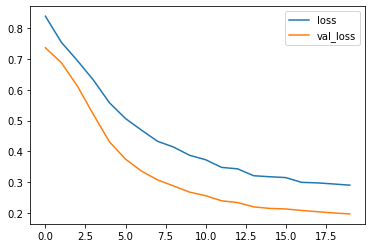

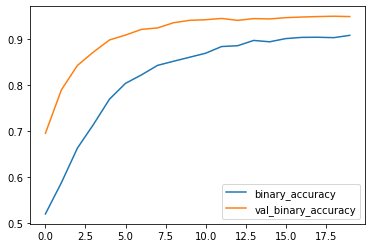

In [32]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [33]:
from RadViz.main import RadViz2D
from RadViz.main import RadViz3D
import time
import plotly.io as pio
pio.renderers.default='iframe'

BPs=10000
time_start = time.time()
y=dataframe_train['target']
X=dataframe_train.drop(['target'], axis=1)
RadViz3D(y,X,BPs)
print( 'RadViz3D done! Time elapsed: {} seconds'.format(time.time()-time_start))

RadViz3D done! Time elapsed: 13.228548049926758 seconds


In [121]:

BPs=10000
time_start = time.time()
X = X_smote_tl
y = Y_smote_tl 
RadViz3D(y,X,BPs)
print( 'RadViz3D done! Time elapsed: {} seconds'.format(time.time()-time_start))

RadViz3D done! Time elapsed: 0.2073497772216797 seconds


In [34]:
BPs=10000
time_start = time.time()
dataframe_test['target'] = Y
y=dataframe_test['target']
X=dataframe_test.drop(['target'], axis=1)
RadViz3D(y,X,BPs)
print( 'RadViz3D done! Time elapsed: {} seconds'.format(time.time()-time_start))

RadViz3D done! Time elapsed: 0.1745297908782959 seconds
